In [1]:
#Creatinng known paramaeteter data

In [2]:
import torch
import numpy as np
from torch import nn
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
weight=0.7
bias=0.3

In [4]:
start=0
stop=1
step=0.002

In [5]:
X=torch.arange(start,stop, step)
len(X)

500

In [6]:
y=weight * X + bias
len(y)

500

In [7]:
X[:10],y[:10]

(tensor([0.0000, 0.0020, 0.0040, 0.0060, 0.0080, 0.0100, 0.0120, 0.0140, 0.0160,
         0.0180]),
 tensor([0.3000, 0.3014, 0.3028, 0.3042, 0.3056, 0.3070, 0.3084, 0.3098, 0.3112,
         0.3126]))

In [8]:
#Splitting the data in training and testing
#We can also used train_test_split method of sklearn

In [9]:
train_split=int(0.8 * len(X))
X_train, y_train=X[:train_split], y[:train_split]
X_test, y_test=X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(400, 400, 100, 100)

In [10]:
#for plotting

In [11]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
    plt.figure(figsize=(20, 7))
    
    plt.scatter(train_data, train_labels, c="b", s=2, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=2, label="Testing data")

    if predictions is not None:
      plt.scatter(test_data, predictions, c="r", s=2, label="Predictions")
    plt.legend(prop={"size": 12});

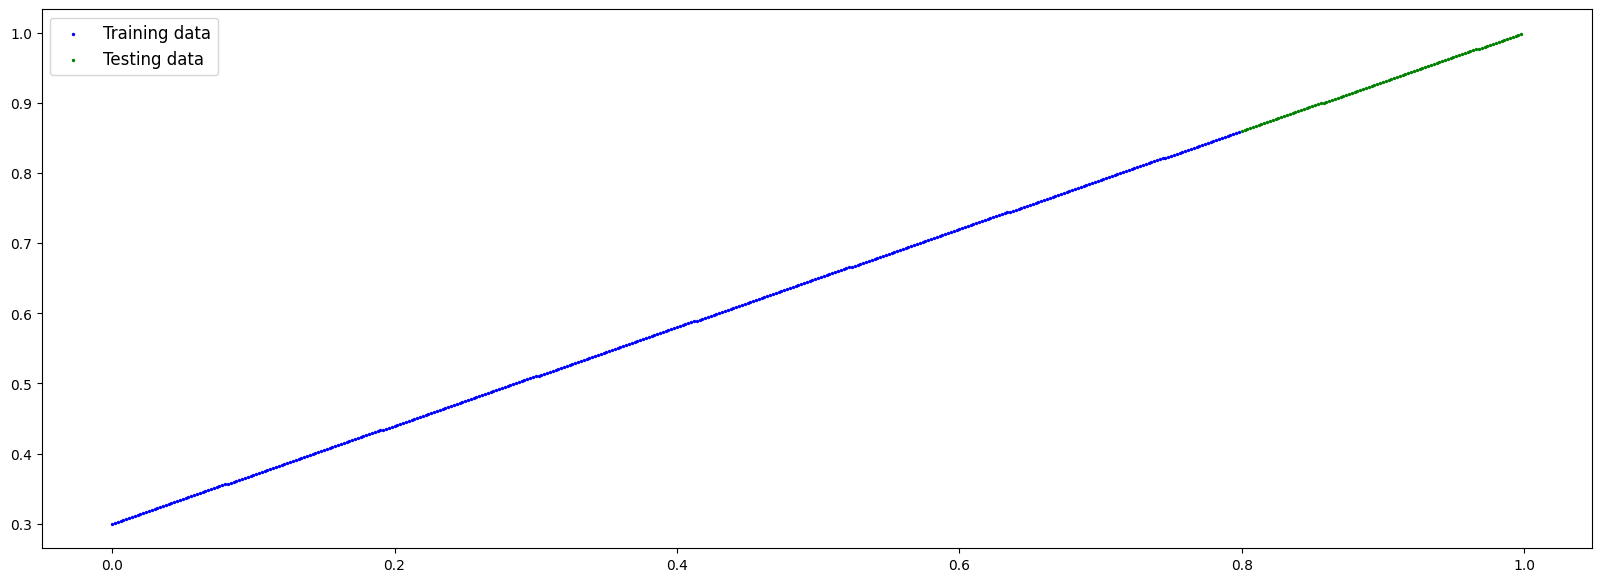

In [12]:
plot_predictions()

In [13]:
#Building the Model (Linear Regression)

In [14]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights=nn.Parameter(torch.randn(1, dtype=torch.float),requires_grad=True)
        self.bias=nn.Parameter(torch.randn(1, dtype=torch.float),requires_grad=True)
    def forward(self, x:torch.Tensor)->torch.Tensor:
        return self.weights * x + self.bias

In [15]:
#checking the content of model

In [16]:
torch.manual_seed(42)
model_lr=LinearRegressionModel()
list(model_lr.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [17]:
model_lr.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [18]:
#using torch inference model to predict

In [19]:
with torch.inference_mode():
    y_preds=model_lr(X_test)

In [20]:
y_preds

tensor([0.3982, 0.3988, 0.3995, 0.4002, 0.4009, 0.4015, 0.4022, 0.4029, 0.4035,
        0.4042, 0.4049, 0.4056, 0.4062, 0.4069, 0.4076, 0.4083, 0.4089, 0.4096,
        0.4103, 0.4110, 0.4116, 0.4123, 0.4130, 0.4136, 0.4143, 0.4150, 0.4157,
        0.4163, 0.4170, 0.4177, 0.4184, 0.4190, 0.4197, 0.4204, 0.4211, 0.4217,
        0.4224, 0.4231, 0.4238, 0.4244, 0.4251, 0.4258, 0.4264, 0.4271, 0.4278,
        0.4285, 0.4291, 0.4298, 0.4305, 0.4312, 0.4318, 0.4325, 0.4332, 0.4339,
        0.4345, 0.4352, 0.4359, 0.4365, 0.4372, 0.4379, 0.4386, 0.4392, 0.4399,
        0.4406, 0.4413, 0.4419, 0.4426, 0.4433, 0.4440, 0.4446, 0.4453, 0.4460,
        0.4466, 0.4473, 0.4480, 0.4487, 0.4493, 0.4500, 0.4507, 0.4514, 0.4520,
        0.4527, 0.4534, 0.4541, 0.4547, 0.4554, 0.4561, 0.4567, 0.4574, 0.4581,
        0.4588, 0.4594, 0.4601, 0.4608, 0.4615, 0.4621, 0.4628, 0.4635, 0.4642,
        0.4648])

In [21]:
print(len(X_test)),
print(len(y_preds))

100
100


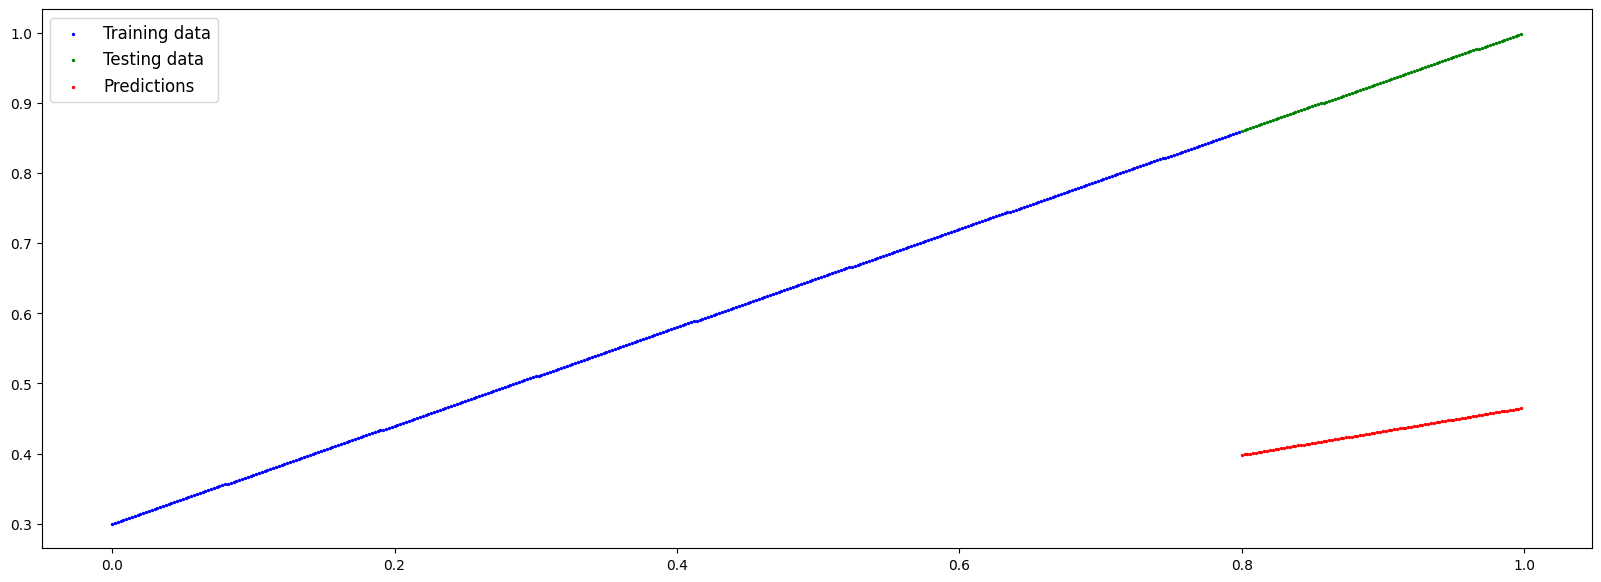

In [22]:
plot_predictions(predictions=y_preds)

In [23]:
y_test

tensor([0.8600, 0.8614, 0.8628, 0.8642, 0.8656, 0.8670, 0.8684, 0.8698, 0.8712,
        0.8726, 0.8740, 0.8754, 0.8768, 0.8782, 0.8796, 0.8810, 0.8824, 0.8838,
        0.8852, 0.8866, 0.8880, 0.8894, 0.8908, 0.8922, 0.8936, 0.8950, 0.8964,
        0.8978, 0.8992, 0.9006, 0.9020, 0.9034, 0.9048, 0.9062, 0.9076, 0.9090,
        0.9104, 0.9118, 0.9132, 0.9146, 0.9160, 0.9174, 0.9188, 0.9202, 0.9216,
        0.9230, 0.9244, 0.9258, 0.9272, 0.9286, 0.9300, 0.9314, 0.9328, 0.9342,
        0.9356, 0.9370, 0.9384, 0.9398, 0.9412, 0.9426, 0.9440, 0.9454, 0.9468,
        0.9482, 0.9496, 0.9510, 0.9524, 0.9538, 0.9552, 0.9566, 0.9580, 0.9594,
        0.9608, 0.9622, 0.9636, 0.9650, 0.9664, 0.9678, 0.9692, 0.9706, 0.9720,
        0.9734, 0.9748, 0.9762, 0.9776, 0.9790, 0.9804, 0.9818, 0.9832, 0.9846,
        0.9860, 0.9874, 0.9888, 0.9902, 0.9916, 0.9930, 0.9944, 0.9958, 0.9972,
        0.9986])

In [24]:
y_preds

tensor([0.3982, 0.3988, 0.3995, 0.4002, 0.4009, 0.4015, 0.4022, 0.4029, 0.4035,
        0.4042, 0.4049, 0.4056, 0.4062, 0.4069, 0.4076, 0.4083, 0.4089, 0.4096,
        0.4103, 0.4110, 0.4116, 0.4123, 0.4130, 0.4136, 0.4143, 0.4150, 0.4157,
        0.4163, 0.4170, 0.4177, 0.4184, 0.4190, 0.4197, 0.4204, 0.4211, 0.4217,
        0.4224, 0.4231, 0.4238, 0.4244, 0.4251, 0.4258, 0.4264, 0.4271, 0.4278,
        0.4285, 0.4291, 0.4298, 0.4305, 0.4312, 0.4318, 0.4325, 0.4332, 0.4339,
        0.4345, 0.4352, 0.4359, 0.4365, 0.4372, 0.4379, 0.4386, 0.4392, 0.4399,
        0.4406, 0.4413, 0.4419, 0.4426, 0.4433, 0.4440, 0.4446, 0.4453, 0.4460,
        0.4466, 0.4473, 0.4480, 0.4487, 0.4493, 0.4500, 0.4507, 0.4514, 0.4520,
        0.4527, 0.4534, 0.4541, 0.4547, 0.4554, 0.4561, 0.4567, 0.4574, 0.4581,
        0.4588, 0.4594, 0.4601, 0.4608, 0.4615, 0.4621, 0.4628, 0.4635, 0.4642,
        0.4648])

In [25]:
y_test-y_preds

tensor([0.4618, 0.4626, 0.4633, 0.4640, 0.4647, 0.4655, 0.4662, 0.4669, 0.4677,
        0.4684, 0.4691, 0.4698, 0.4706, 0.4713, 0.4720, 0.4727, 0.4735, 0.4742,
        0.4749, 0.4756, 0.4764, 0.4771, 0.4778, 0.4786, 0.4793, 0.4800, 0.4807,
        0.4815, 0.4822, 0.4829, 0.4836, 0.4844, 0.4851, 0.4858, 0.4865, 0.4873,
        0.4880, 0.4887, 0.4894, 0.4902, 0.4909, 0.4916, 0.4924, 0.4931, 0.4938,
        0.4945, 0.4953, 0.4960, 0.4967, 0.4974, 0.4982, 0.4989, 0.4996, 0.5003,
        0.5011, 0.5018, 0.5025, 0.5033, 0.5040, 0.5047, 0.5054, 0.5062, 0.5069,
        0.5076, 0.5083, 0.5091, 0.5098, 0.5105, 0.5112, 0.5120, 0.5127, 0.5134,
        0.5142, 0.5149, 0.5156, 0.5163, 0.5171, 0.5178, 0.5185, 0.5192, 0.5200,
        0.5207, 0.5214, 0.5221, 0.5229, 0.5236, 0.5243, 0.5251, 0.5258, 0.5265,
        0.5272, 0.5280, 0.5287, 0.5294, 0.5301, 0.5309, 0.5316, 0.5323, 0.5330,
        0.5338])

In [26]:
#Creating Loss Function as MAE and optimizer and training loop

In [27]:
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_lr.parameters(), lr=0.01)

In [28]:
#Adjusting epochs

In [29]:
torch.manual_seed(42)
epochs=230

#loss lists
train_loss_value=[]
test_loss_value=[]
epoch_count=[]

#Training loop
for epoch in range(epochs):
    #train data
    model_lr.train()
    
    #fwd method
    y_pred=model_lr(X_train)

    #clculate the loss value
    loss=loss_fn(y_pred, y_train)
    optimizer.zero_grad()

    #perform bp error on loss fn 
    loss.backward()

    #step teh optimizer
    optimizer.step()

    #testing
    model_lr.eval()

    with torch.inference_mode():
        test_pred = model_lr(X_test)
        test_loss=loss_fn(test_pred, y_test)

        if epoch % 10==0:
            epoch_count.append(epoch)
            train_loss_value.append(loss.detach().numpy())
            test_loss_value.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.31615114212036133 | MAE Test Loss: 0.484218955039978 
Epoch: 10 | MAE Train Loss: 0.20023101568222046 | MAE Test Loss: 0.34834885597229004 
Epoch: 20 | MAE Train Loss: 0.08987633883953094 | MAE Test Loss: 0.21738135814666748 
Epoch: 30 | MAE Train Loss: 0.05263463407754898 | MAE Test Loss: 0.14330445230007172 
Epoch: 40 | MAE Train Loss: 0.044976845383644104 | MAE Test Loss: 0.11211289465427399 
Epoch: 50 | MAE Train Loss: 0.04120706021785736 | MAE Test Loss: 0.09747876226902008 
Epoch: 60 | MAE Train Loss: 0.037771862000226974 | MAE Test Loss: 0.08799232542514801 
Epoch: 70 | MAE Train Loss: 0.03435484319925308 | MAE Test Loss: 0.07968062162399292 
Epoch: 80 | MAE Train Loss: 0.03093849867582321 | MAE Test Loss: 0.07164589315652847 
Epoch: 90 | MAE Train Loss: 0.02752225659787655 | MAE Test Loss: 0.06368041783571243 
Epoch: 100 | MAE Train Loss: 0.024105940014123917 | MAE Test Loss: 0.05564570054411888 
Epoch: 110 | MAE Train Loss: 0.020689668133854866 | M

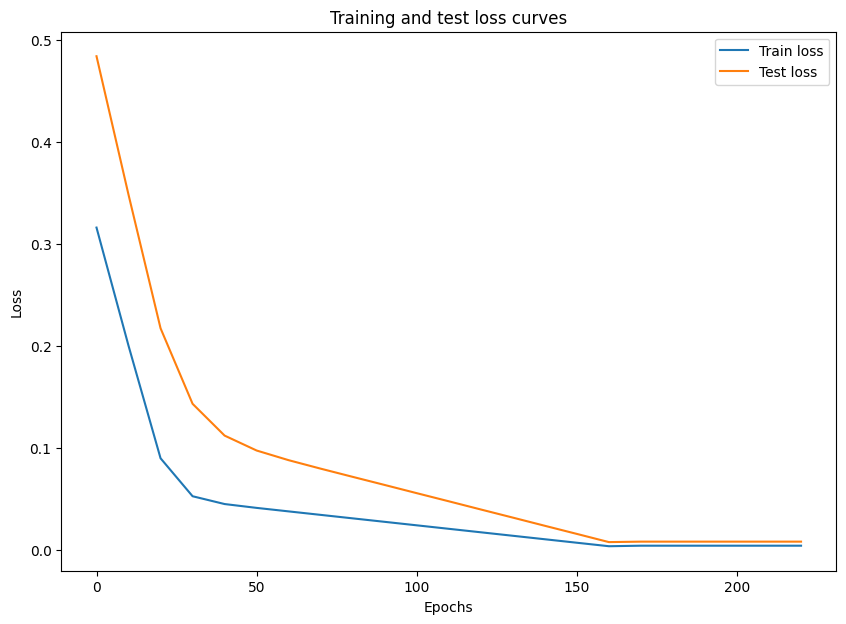

In [30]:
# Plot the loss curves
plt.figure(figsize=(10,7))
plt.plot(epoch_count, train_loss_value, label="Train loss")
plt.plot(epoch_count, test_loss_value, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [31]:
print(model_lr.state_dict())

OrderedDict({'weights': tensor([0.6973]), 'bias': tensor([0.2970])})


In [32]:
print(weight, bias)

0.7 0.3


In [33]:
model_lr.eval()
with torch.inference_mode():
    y_preds=model_lr(X_test)

In [34]:
y_preds

tensor([0.8548, 0.8562, 0.8576, 0.8590, 0.8604, 0.8618, 0.8632, 0.8645, 0.8659,
        0.8673, 0.8687, 0.8701, 0.8715, 0.8729, 0.8743, 0.8757, 0.8771, 0.8785,
        0.8799, 0.8813, 0.8827, 0.8841, 0.8855, 0.8869, 0.8883, 0.8896, 0.8910,
        0.8924, 0.8938, 0.8952, 0.8966, 0.8980, 0.8994, 0.9008, 0.9022, 0.9036,
        0.9050, 0.9064, 0.9078, 0.9092, 0.9106, 0.9120, 0.9134, 0.9148, 0.9161,
        0.9175, 0.9189, 0.9203, 0.9217, 0.9231, 0.9245, 0.9259, 0.9273, 0.9287,
        0.9301, 0.9315, 0.9329, 0.9343, 0.9357, 0.9371, 0.9385, 0.9399, 0.9412,
        0.9426, 0.9440, 0.9454, 0.9468, 0.9482, 0.9496, 0.9510, 0.9524, 0.9538,
        0.9552, 0.9566, 0.9580, 0.9594, 0.9608, 0.9622, 0.9636, 0.9650, 0.9663,
        0.9677, 0.9691, 0.9705, 0.9719, 0.9733, 0.9747, 0.9761, 0.9775, 0.9789,
        0.9803, 0.9817, 0.9831, 0.9845, 0.9859, 0.9873, 0.9887, 0.9901, 0.9915,
        0.9928])

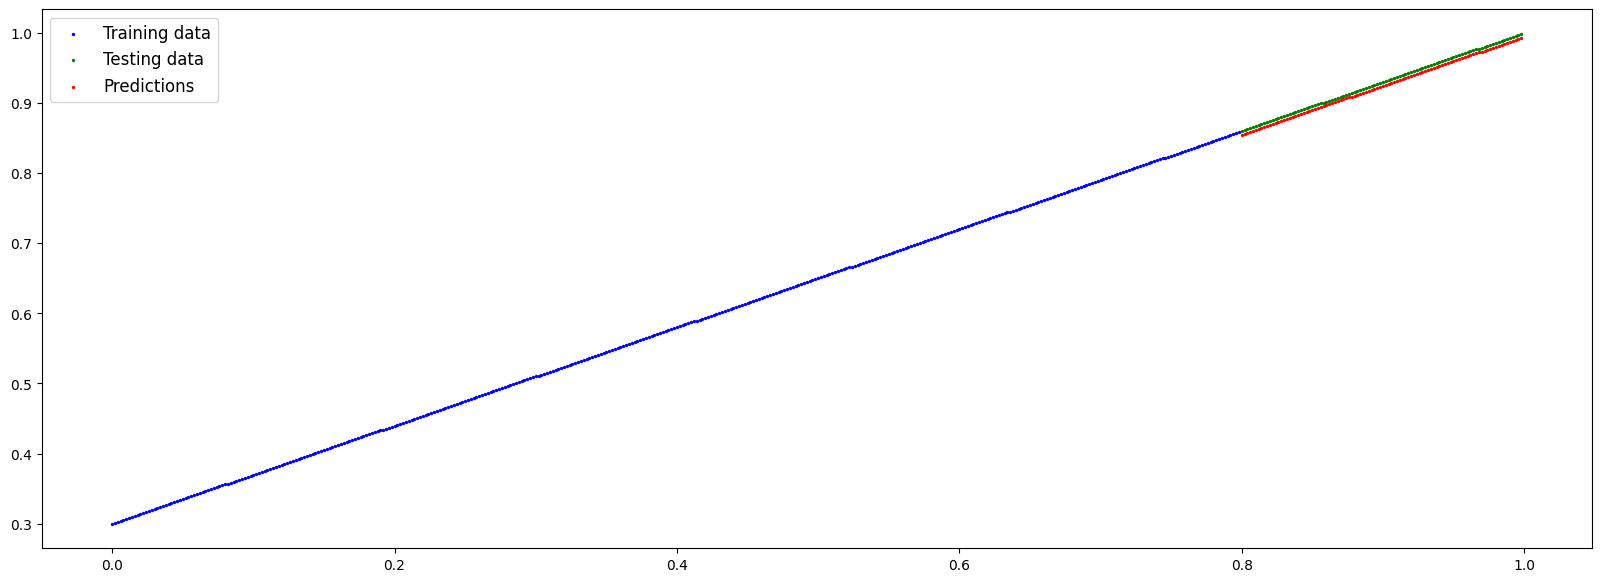

In [35]:
plot_predictions(predictions=y_preds)

In [36]:
model_lr.eval()
with torch.inference_mode():
    y_preds_new=model_lr(X_test)
y_preds_new

tensor([0.8548, 0.8562, 0.8576, 0.8590, 0.8604, 0.8618, 0.8632, 0.8645, 0.8659,
        0.8673, 0.8687, 0.8701, 0.8715, 0.8729, 0.8743, 0.8757, 0.8771, 0.8785,
        0.8799, 0.8813, 0.8827, 0.8841, 0.8855, 0.8869, 0.8883, 0.8896, 0.8910,
        0.8924, 0.8938, 0.8952, 0.8966, 0.8980, 0.8994, 0.9008, 0.9022, 0.9036,
        0.9050, 0.9064, 0.9078, 0.9092, 0.9106, 0.9120, 0.9134, 0.9148, 0.9161,
        0.9175, 0.9189, 0.9203, 0.9217, 0.9231, 0.9245, 0.9259, 0.9273, 0.9287,
        0.9301, 0.9315, 0.9329, 0.9343, 0.9357, 0.9371, 0.9385, 0.9399, 0.9412,
        0.9426, 0.9440, 0.9454, 0.9468, 0.9482, 0.9496, 0.9510, 0.9524, 0.9538,
        0.9552, 0.9566, 0.9580, 0.9594, 0.9608, 0.9622, 0.9636, 0.9650, 0.9663,
        0.9677, 0.9691, 0.9705, 0.9719, 0.9733, 0.9747, 0.9761, 0.9775, 0.9789,
        0.9803, 0.9817, 0.9831, 0.9845, 0.9859, 0.9873, 0.9887, 0.9901, 0.9915,
        0.9928])

In [37]:
print(y_preds==y_preds_new)

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True])


In [38]:
#saving the model

In [39]:
torch.save(model_lr.state_dict(), "linear_regression_model.pth")
print("Model saved successfully")

Model saved successfully


In [42]:
#Loading Model

In [43]:
# Creating Model instance
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load("linear_regression_model.pth"))

loaded_model.eval()
print("Model loaded")

Model loaded


In [44]:
with torch.inference_mode():
    y_pred_original = model_lr(X_test)
    y_pred_loaded = loaded_model(X_test)

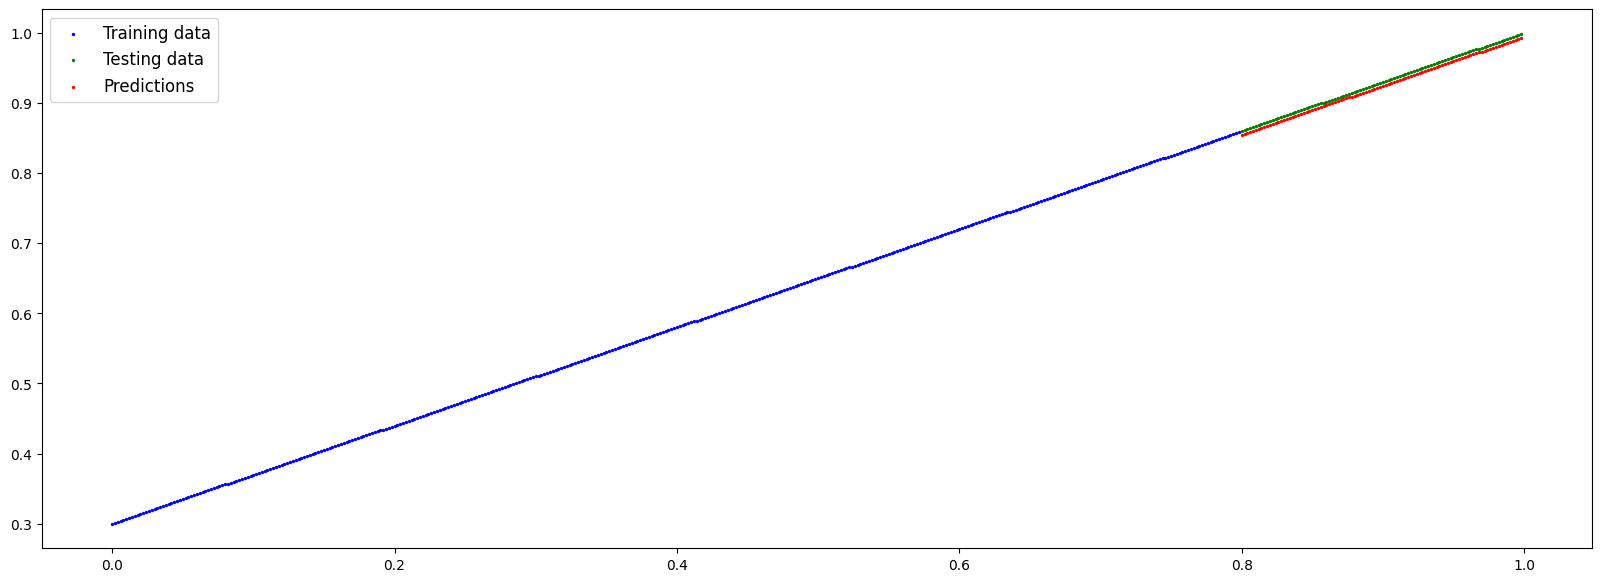

In [45]:
plot_predictions(X_train, y_train, X_test, y_test, y_pred_loaded)

In [46]:
print("Difference between original & loaded model predictions:", torch.sum(y_pred_original - y_pred_loaded).item())

Difference between original & loaded model predictions: 0.0


In [47]:
model_lr.state_dict()

OrderedDict([('weights', tensor([0.6973])), ('bias', tensor([0.2970]))])

In [48]:
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.6973])), ('bias', tensor([0.2970]))])

In [40]:
#Using Second method

In [41]:
model_path=Path('models')
model_path.mkdir(parents=True, exist_ok=True)

model_name='LR_Model1.pth'
model_save_path=model_path/model_name

print(f"saving model to : {model_save_path}")
torch.save(obj=model_lr.state_dict(),
           f=model_save_path)

saving model to : models\LR_Model1.pth


In [50]:
loaded_model_lr=LinearRegressionModel()

In [55]:
loaded_model_lr.state_dict()

OrderedDict([('weights', tensor([0.6973])), ('bias', tensor([0.2970]))])